## 1. Import the data set you exported in Exercise 4.9 and into a new Jupyter notebook.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#defining path

path = r'C:\Users\julia\Instacart Basket Analysis 11\8'

In [3]:
#executing path 

path

'C:\\Users\\julia\\Instacart Basket Analysis 11\\8'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_orders_products_merged_customers.pkl'))

In [5]:
# Checking dataframe

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df.shape

(32404859, 33)

## 2. Consider any security implications that might exist for this new data. You'll need to address PII data in the data before continuing your analysis. 

#### First_name and last_name should be dropped due to PII. Date_joined is unnecessary and should be dropped as well. 

#### Due to memory issues, I will provide the command for dropping those columns: df_icba = df.drop(columns=['first_name', 'last_name', 'date_joined']) rather than actually dropping the columns.

## 3a. Create a "Region" column based on the "State" column from your customers data set.

In [7]:
# Creating region lists

Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [8]:
# Creating regional flag column

df.loc[df['state'].isin(Northeast),'region']='Northeast'
df.loc[df['state'].isin(Midwest),'region']='Midwest'
df.loc[df['state'].isin(South),'region']='South'
df.loc[df['state'].isin(West),'region']='West'

In [9]:
# Checking length of new column

len(df['region'])

32404859

In [10]:
# Checking frequency

df['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## 3b. Determine whether there's a difference in spending habits between the different U.S. regions.

In [11]:
# Creating a crosstab 

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [12]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


## 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample. 

In [13]:
# Creating exclusion flag column

df.loc[df['max_order']<5, 'activity']='low'
df.loc[df['max_order']>=5, 'activity']='high'

In [ ]:
# Creating a dataframe of customers with orders less than 5

df_low = df[df['activity']=='low']

In [15]:
# Checking dataframe

df_low.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,activity
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low


In [16]:
df_low['activity'].value_counts(dropna=False)

low    1440295
Name: activity, dtype: int64

In [17]:
# Exporting df_low

df_low.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

## 5. ~ 7. Create a profiling variable based on age, income, certain goods in the "department_id" column and number of dependents. Create an appropriate visualization to show the distribution of profiles. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Age Profile

In [18]:
# Creating age profiling variable 

df.loc[df['age']<=25, 'age_group']='Young Adult'
df.loc[(df['age']<65)&(df['age']>25), 'age_group']='Adult'
df.loc[df['age']>=65, 'age_group']='Senior'

In [19]:
# Checking new variable

df['age_group'].value_counts()

Adult          19784586
Senior          8575084
Young Adult     4045189
Name: age_group, dtype: int64

In [20]:
# Aggregate for age group usage frequency

df.groupby('age_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
age_group                                           
Adult                           10.416147  0.0  30.0
Senior                          10.362496  0.0  30.0
Young Adult                     10.382574  0.0  30.0

In [21]:
# Aggregate for age group expenditure

df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        12.031993  1.0  99999.0
Senior       11.768850  1.0  99999.0
Young Adult  12.175118  1.0  99999.0

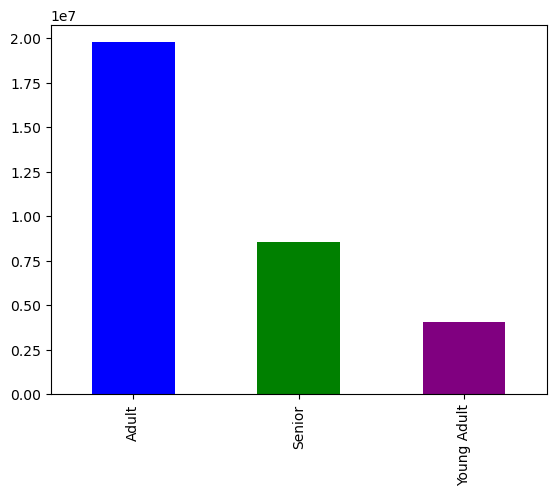

In [22]:
# Age profile visualization

bar=df['age_group'].value_counts().plot.bar(color =['blue', 'green', 'purple'])

In [23]:
# Export Bar Chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_agegroup.png'))

### Income Profile

In [24]:
# Create income profiling variable

df.loc[df['income']<40000, 'income_group']='low income'
df.loc[(df['income']>=40000)&(df['income']<150000), 'income_group']='middle income'
df.loc[df['income']>150000, 'income_group']='high income'

In [25]:
# Checking new variable

df['income_group'].value_counts()

middle income    26626080
high income       4050840
low income        1727198
Name: income_group, dtype: int64

In [26]:
# Aggregate for income group order frequency

df.groupby('income_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                       mean  min   max
income_group                                          
high income                       10.175597  0.0  30.0
low income                        11.254839  0.0  30.0
middle income                     10.375971  0.0  30.0

In [27]:
# Aggregate for income group expenditure

df.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_group                          
high income    32.894506  1.0  99999.0
low income      6.495264  1.0     25.0
middle income   9.154296  1.0  99999.0

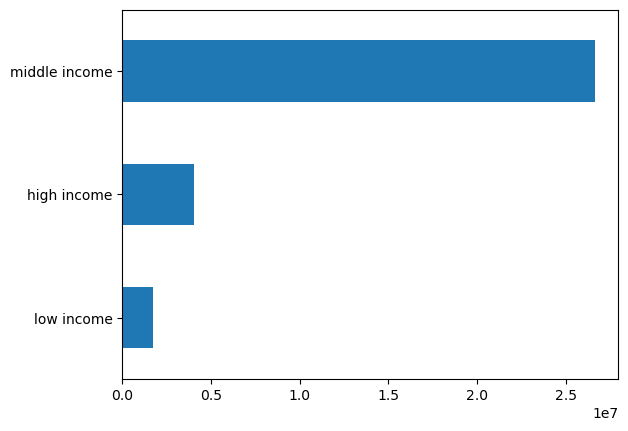

In [28]:
# Income profile visualization

bar2 = df['income_group'].value_counts().sort_values().plot.barh()

In [29]:
# Export Bar Chart

bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_incomegroup.png'))

In [30]:
#Creating dependent group profiling variable

df.loc[df['number_of_dependents']>0, 'dependent_group']='has dependents' 
df.loc[df['number_of_dependents']==0, 'dependent_group']='no dependents'

In [31]:
# Checking new variable

df['dependent_group'].value_counts()

has dependents    24307356
no dependents      8097503
Name: dependent_group, dtype: int64

In [32]:
# Aggregate for dependent group order frequency

df.groupby('dependent_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                         mean  min   max
dependent_group                                         
has dependents                      10.407817  0.0  30.0
no dependents                       10.367567  0.0  30.0

In [33]:
# Aggregate for dependent group expenditure

df.groupby('dependent_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependent_group                         
has dependents   11.930584  1.0  99999.0
no dependents    12.129243  1.0  99999.0

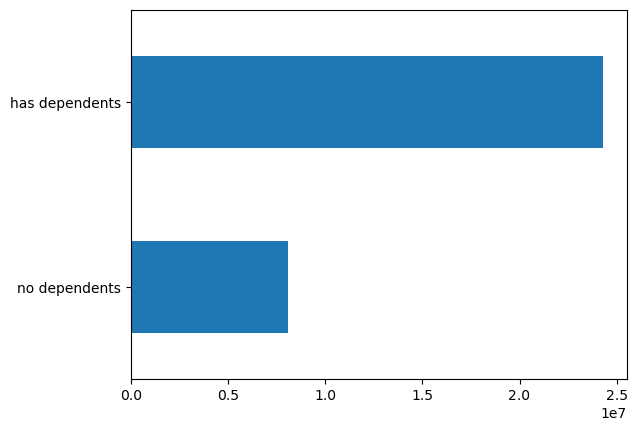

In [34]:
# Number of dependent group profile visualization

bar10 = df['dependent_group'].value_counts().sort_values().plot.barh()

In [35]:
# Export Bar Chart

bar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependentgroup.png'))

### Department ID profile

In [36]:
# Importing departments dataframe

df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [37]:
# Checking Dataframe

df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
# Renaming unnamed column to department_id

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [39]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [40]:
# Turning department dataframe into data dictionary

zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [41]:
# Connect department names to department_id in dataframe

df['department'] = df['department_id'].map(data_dict)

In [42]:
# Checking dataframe

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependents,marital_status,income,region,activity,age_group,income_group,dependent_group,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,beverages


#### Department - Baby Profile

In [43]:
# Creating baby department profiling variable

df['baby_status'] = [1 if x == 'babies' else 0 for x in df['department']]
df['baby_status'] = df.groupby(['user_id'])['baby_status'].transform(np.max)

In [44]:
# Checking new variable

df['baby_status'].value_counts(dropna=False)

0    22431550
1     9973309
Name: baby_status, dtype: int64

In [45]:
# Aggregatefor baby status bracket order frequency

df.groupby('baby_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
baby_status                                         
0                               11.253698  0.0  30.0
1                                8.472618  0.0  30.0

In [46]:
# Aggregate for baby status bracket expenditure

df.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
baby_status                         
0            12.515291  1.0  99999.0
1            10.776779  1.0  99999.0

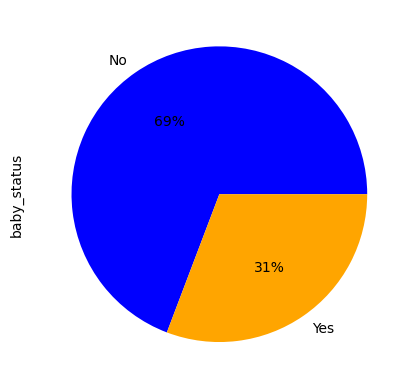

In [47]:
# Baby Status Visualization

pie = df['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','orange'])

In [48]:
# Export pie chart

pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pei_babystatus.png'))

#### Department - Alcohol Profile

In [49]:
# Creating alcohol profiling variable

df['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df['department']]
df['alcohol_status'] = df.groupby(['user_id'])['alcohol_status'].transform(np.max)

In [50]:
# Checking new variable

df['alcohol_status'].value_counts(dropna=False)

0    29991046
1     2413813
Name: alcohol_status, dtype: int64

In [51]:
# Aggregate for alcohol_status bracket order frequency

df.groupby('alcohol_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                        mean  min   max
alcohol_status                                         
0                                   10.42511  0.0  30.0
1                                   10.05793  0.0  30.0

In [52]:
# Aggregate for alcohol_status bracket expenditure

df.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
alcohol_status                         
0               11.058561  1.0  99999.0
1               23.431691  1.0  99999.0

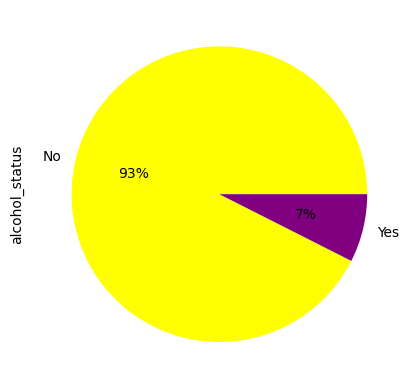

In [53]:
# Alcohol_status visualization

pie2 = df['alcohol_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['yellow','purple'])

In [54]:
# Export alcohol_status pie chart

pie2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_alcoholstatus.png'))

#### Department - Pet Profile

In [55]:
#Creating pet profiling variable: 
#bought pet supplies(1) 
#didn't buy pet supplies (0)

df['pet_status'] = [1 if x == 'pets' else 0 for x in df['department']]
df['pet_status']=df.groupby(['user_id'])['pet_status'].transform(np.max)

In [56]:
# Checking new variable

df['pet_status'].value_counts(dropna=False)

0    28876718
1     3528141
Name: pet_status, dtype: int64

In [57]:
#Aggregating for pet_status bracket order frequency
df.groupby('pet_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                    mean  min   max
pet_status                                         
0                              10.517953  0.0  30.0
1                               9.414006  0.0  30.0

In [58]:
#Aggregating for pet_status bracket expenditure
df.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                 mean  min      max
pet_status                         
0           11.680857  1.0  99999.0
1           14.430461  1.0  99999.0

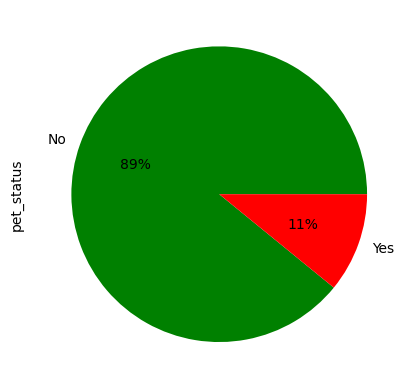

In [59]:
# Pet_status Visualization

pie3 = df['pet_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['green','red'])

In [60]:
# Export Pet_status Pie Chart

pie3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_petstatus.png'))

## 8. ~ 9. Compare your customer profiles with regions and departments. Produce suitable charts to illustrate your reports and export them in your project folder.

In [61]:
# Creating crosstab for region and age group

age_region = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [62]:
# Checking crosstab

age_region

age_group,Adult,Senior,Young Adult
region,,,
Midwest,4666947,1990844,939534
Northeast,3457721,1553903,711112
South,6578963,2836257,1376665
West,5080955,2194080,1017878


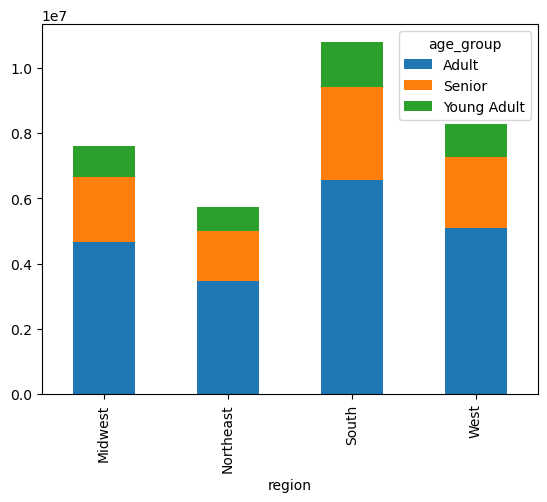

In [63]:
# Age_region Bar Chart
bar3 = age_region.plot(kind='bar', stacked =True)

In [64]:
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [65]:
# Creating crosstab for region and income

region_income = pd.crosstab(df['region'], df['income_group'], dropna = False)

In [66]:
# Checking crosstab

region_income

income_group,high income,low income,middle income
region,,,
Midwest,955414,401040,6240337
Northeast,706738,303379,4712569
South,1342055,590337,8859336
West,1046633,432442,6813838


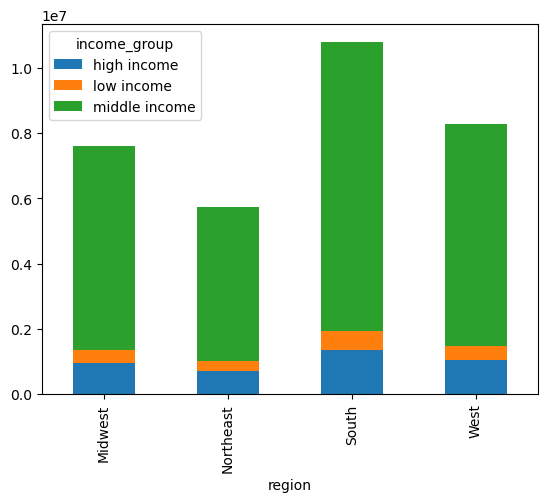

In [67]:
# Region_income bar chart

bar4 = region_income.plot(kind='bar', stacked =True)

In [68]:
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income.png'))

In [69]:
# Creating crosstab for region and department

region_dep = pd.crosstab(df['department'], df['region'], dropna = False)

In [70]:
# Checking Crosstab

region_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


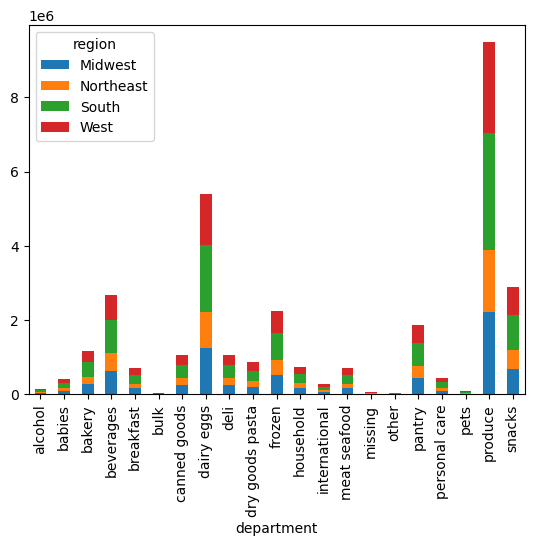

In [71]:
# Region_department Bar Chart

bar5 = region_dep.plot(kind='bar', stacked =True)

In [72]:
# Exporting bar chart

bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

In [73]:
# Creating crosstab for region and price range

region_pricerange = pd.crosstab(df['region'], df['price_range_loc'], dropna = False)

In [74]:
# Checking crosstab

region_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,97918,2372304,5127103
Northeast,73202,1792943,3856591
South,139390,3368338,7284157
West,107168,2592736,5593009


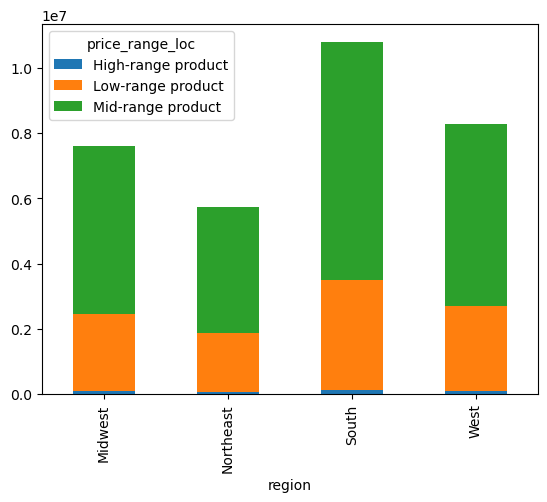

In [75]:
# Region_pricerange Bar Chart

bar6 = region_pricerange.plot(kind='bar', stacked =True)

In [76]:
# Exporting bar chart

bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_pricerange.png'))

In [77]:
# Creating crosstab for income and frequency

income_freq = pd.crosstab(df['income_group'], df['order_frequency_flag'], dropna = False)

In [78]:
# Checking crosstab

income_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
high income,2738005,424272,888563
low income,1069109,242934,415155
middle income,17752205,2969181,5904689


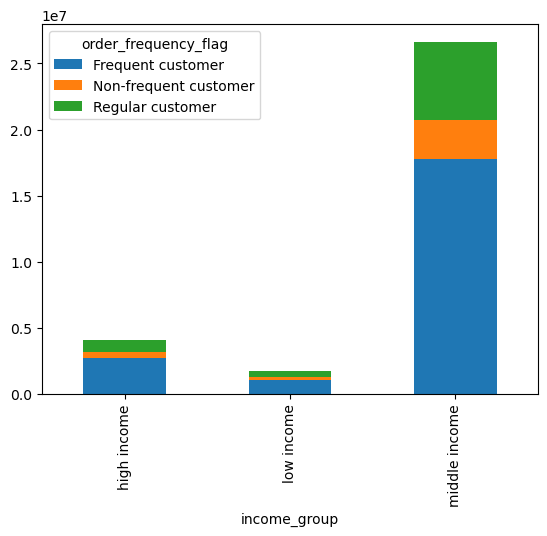

In [79]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

In [80]:
# Exporting bar chart

bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_frequency.png'))

In [81]:
# Creating crosstab for age and frequency

age_freq = pd.crosstab(df['age_group'], df['order_frequency_flag'], dropna = False)

In [82]:
# Checking crosstab

age_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,13133299,2232850,4418432
Senior,5728812,951609,1894663
Young Adult,2697742,451978,895469


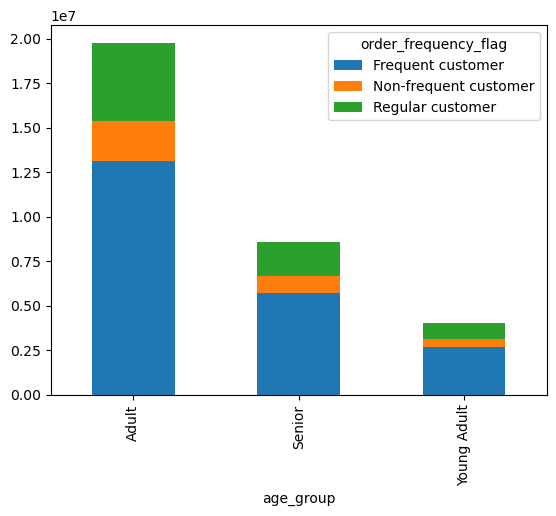

In [83]:
# Region Price Range Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

In [84]:
# Exporting bar chart

bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_freq.png'))

In [85]:
# Creating crosstab for marital status and frequency

marital_freq = pd.crosstab(df['marital_status'], df['order_frequency_flag'], dropna = False)

In [86]:
# Checking crosstab

marital_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1852101,306903,612808
living with parents and siblings,1047100,175019,328484
married,15137381,2564637,5054730
single,3523271,589878,1212542


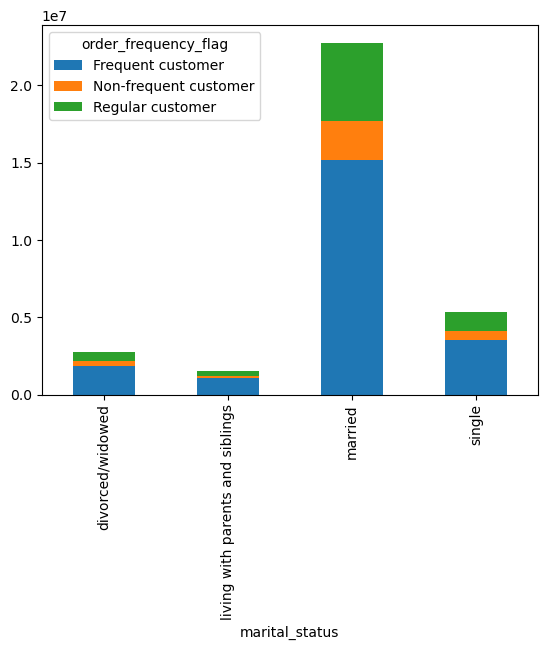

In [87]:
#Marital_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

In [88]:
# Exporting bar chart

bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_freq.png'))

In [89]:
# export dataframe 

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'insta_final.pkl')) 

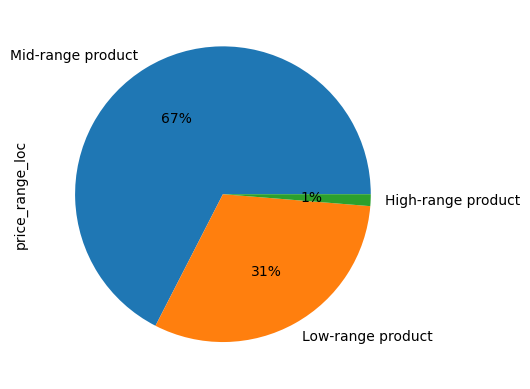

In [90]:
pie = df['price_range_loc'].value_counts().plot.pie(autopct=('%1.f%%'))

In [91]:
# Exporting pie chart

pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_range_loc.png'))

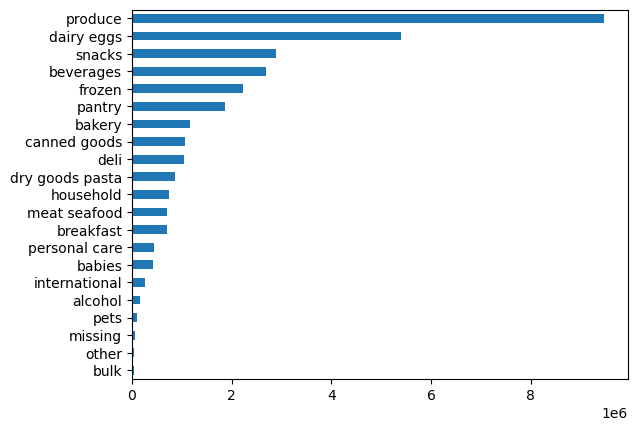

In [92]:
Bar =df.department.value_counts().sort_values().plot(kind = 'barh')

In [93]:
# Exporting bar chart

Bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_department.png'))

In [94]:
dep_freq = pd.crosstab(df['department'], df['order_frequency_flag'], dropna = False)

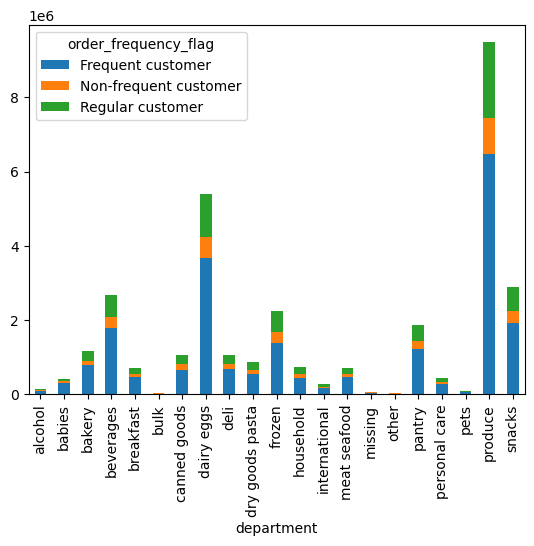

In [95]:
bar = dep_freq.plot(kind='bar', stacked =True)

In [96]:
# Exporting bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency.png'))